# Caracterização meteorológica da área de estudoNesta atividade, caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos: 1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. 
Superfície - Albedo, razão de Bowen e rugosidade.


## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [2]:
# selecionando arquivos para análise 
metSuperficiePath = "C:\\ENS5173\\inputs\\meteoSuperficie"
files = os.listdir(metSuperficiePath) # Listando os arquivos dentro do diretório
print(files)

['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [3]:
# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [4]:
# Criar uma coluna de data e hora combinando as colunas separadas
# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
metSuperficie.set_index(metSuperficie['datetime'], inplace=True) 
metSuperficie

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


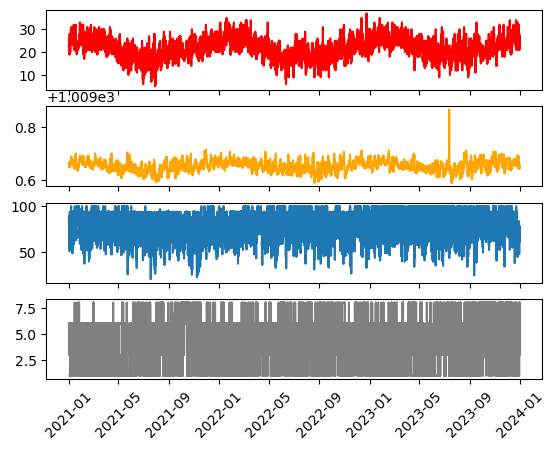

In [5]:
# Analisando os dados através de figuras

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é 31.0
O percentil 99 da pressão é 1009.6967607391396
O percentil 99 da cco é 1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x1c0bfaecbf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0bfaed190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0bfaec8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0bfaed790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0bfaeda30>],
 'means': []}

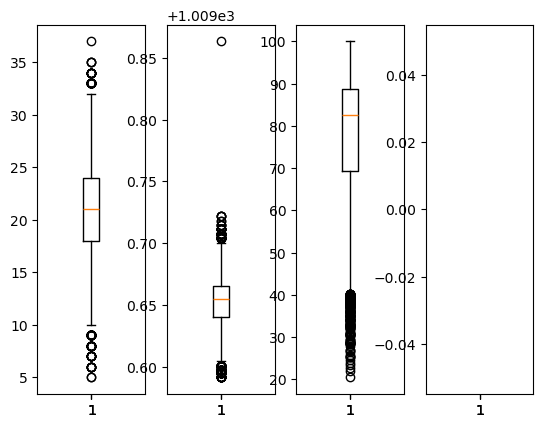

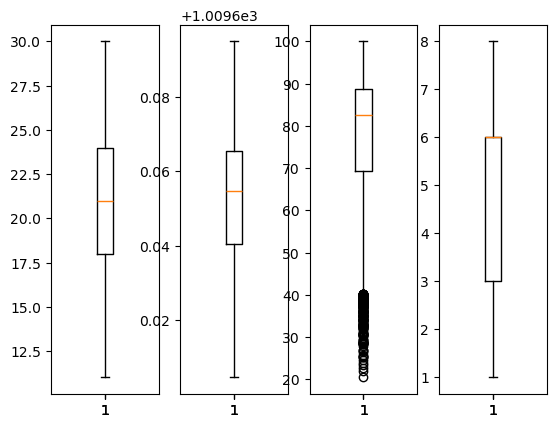

In [6]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 99
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é '+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é '+str(p99))
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é '+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

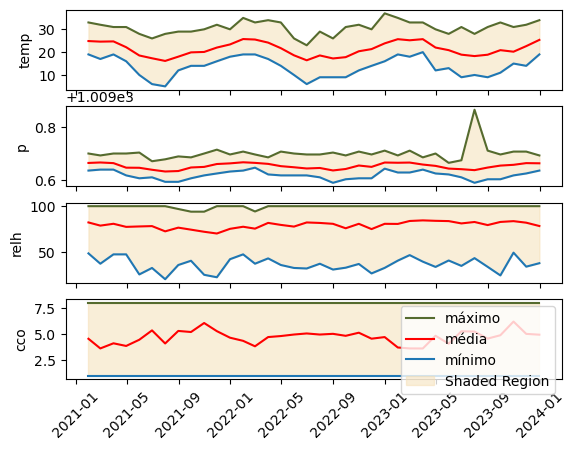

In [7]:
# Estatísticas dos dados
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index, max_mensal['temp'], color='darkolivegreen', label='máximo')
ax[0].plot(media_mensal.index, media_mensal['temp'],color='red', label='média')
ax[0].plot(media_mensal.index, min_mensal['temp'], label='mínimo')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='wheat', alpha=0.5, label='Shaded Region')
ax[0].set_ylabel('temp') 

ax[1].plot(media_mensal.index, max_mensal['p'], color='darkolivegreen', label='máximo')
ax[1].plot(media_mensal.index, media_mensal['p'],color='red', label='média')
ax[1].plot(media_mensal.index, min_mensal['p'], label='mínimo')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='wheat', alpha=0.5, label='Shaded Region')
ax[1].set_ylabel('p')

ax[2].plot(media_mensal.index, max_mensal['relh'], color='darkolivegreen', label='máximo')
ax[2].plot(media_mensal.index, media_mensal['relh'],color='red', label='média')
ax[2].plot(media_mensal.index, min_mensal['relh'], label='mínimo')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='wheat', alpha=0.5, label='Shaded Region')
ax[2].set_ylabel('relh')

ax[3].plot(media_mensal.index, max_mensal['cco'], color='darkolivegreen', label='máximo')
ax[3].plot(media_mensal.index, media_mensal['cco'],color='red', label='média')
ax[3].plot(media_mensal.index, min_mensal['cco'], label='mínimo')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='wheat', alpha=0.5, label='Shaded Region')
ax[3].set_ylabel('cco')

ax[3].tick_params(axis='x', rotation=45)

plt.legend()
plt.show()  

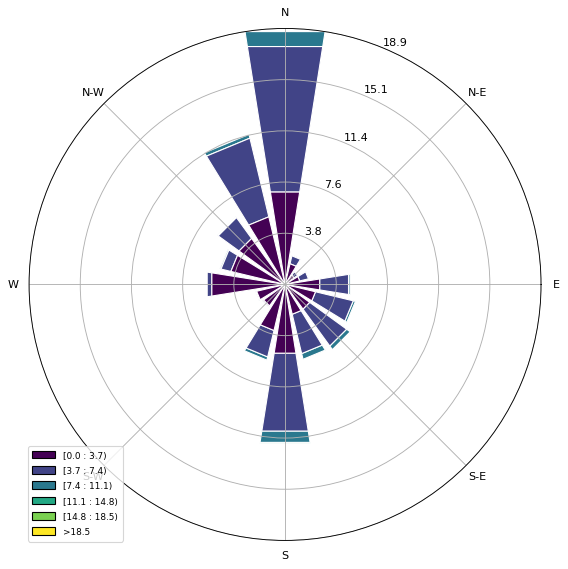

In [8]:
# Criando minha rosa dos ventos
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python  

In [9]:
# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

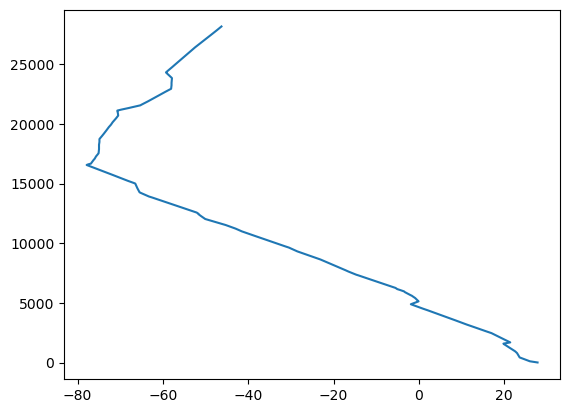

In [10]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

[-1.8        -0.74303406 -0.16574586 -0.30075188 -0.35714286 -0.43613707
 -0.42857143 -0.48780488 -0.32786885  1.53846154 -0.57416268 -0.56338028
 -0.82191781 -0.80139373 -0.80701754 -0.75362319 -0.77014218 -0.81481481
 -0.7651715   0.75675676  0.70175439 -0.28409091 -0.28846154 -0.41322314
 -0.39473684 -0.66666667 -0.52830189 -0.31746032 -0.80357143 -0.86419753
 -0.40816327 -0.82969432 -0.83003953 -0.82687339 -0.82417582 -0.89285714
 -0.69498069 -0.61946903 -0.65265487 -0.79881657 -0.61919505 -0.85106383
 -0.85106383 -0.81188119 -0.81325301 -0.80378251 -0.63636364 -0.71428571
 -0.77192982 -0.9486166  -0.40160643 -0.375       0.         -0.40816327
 -0.82568807 -0.82833133 -0.8974359  -0.63492063 -0.5        -0.15060241
 -0.12626263 -0.66666667 -0.77777778 -0.71969697 -0.73200993  0.71428571
  1.05263158  0.20338983  0.24390244  0.15873016  0.23255814  0.22556391
  0.          0.02941176  0.          0.          0.04291845  0.
  0.234375    0.2247191   0.2166065   0.20833333  0.2040816

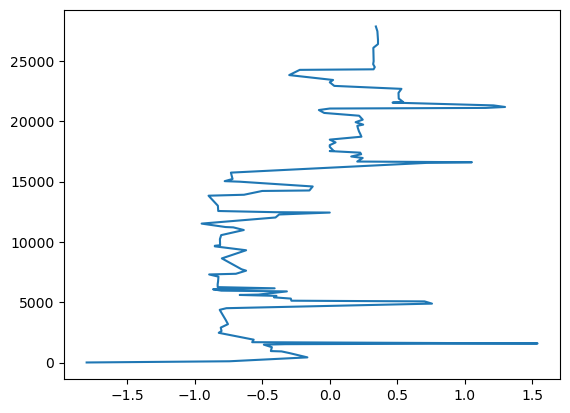

In [11]:
#Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

## Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica  

In [12]:
best_gfs = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p25deg/Best') 

In [13]:
#Show geographical range
print(best_gfs.lon.values.min(),best_gfs.lon.values.max(),best_gfs.lat.values.min(),best_gfs.lat.values.max()) 

0.0 359.75 -90.0 90.0


In [14]:
#Grab time variable from dataset
time=best_gfs.time

#Check time range of dataset
# dataset traz informações deste período: 
print("Dataset Start Time:",time.values.min())
print("Dataset End Time:",time.values.max())

Dataset Start Time: 2024-05-06T03:00:00.000000000
Dataset End Time: 2024-05-28T12:00:00.000000000


In [18]:
# definindo hora da análise 
hora = datetime(2024, 5, 15, 9)
print('Hora da análise: ', hora)

# definindo as coordenadas do local de análise 
latMax = -27.1
latMin = -28
lonMax = 360-47.9
lonMin = 360-49

#subset data using slices of time, lat and lon
#Show values of dimensions
data = best_gfs.sel(time=hora, lat=slice(latMax,latMin), lon=slice(lonMin,lonMax))

lon = data.coords['lon'].values.tolist() 
lat = data.coords['lat'].values.tolist() 
temp = data.variables['Temperature_surface'].values.tolist() 
matriz = np.array(temp)
matriz = matriz - 273.15 # kelvin para graus celsius 

print(len(lat), len(lon), matriz[0].shape) 

Hora da análise:  2024-05-15 09:00:00
4 5 (4, 5)


Text(0.5, 1.0, 'Temperatura (°C) em 2024-05-15 09:00:00')

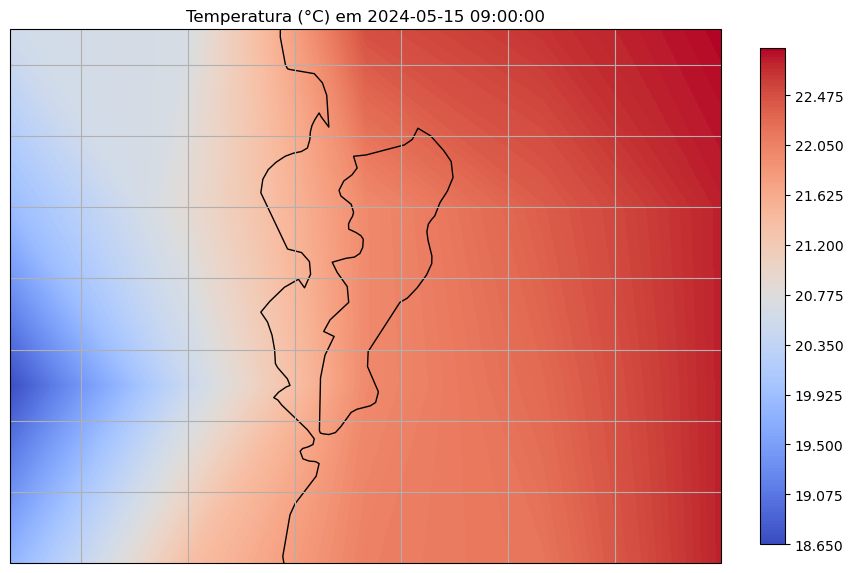

In [19]:
# Create a new figure
fig = plt.figure(figsize=(10, 8))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())

# Add state boundaries to plot
#ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')

# Contour temperature at each lat/long
cf = ax.contourf(lon, lat, matriz[0], levels=200, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

ax.coastlines() 
ax.gridlines()
ax.add_feature(cfeature.BORDERS) #Adicionando fronteiras de países

# Make a title with the time value
ax.set_title('Temperatura (°C) em ' +str(hora), fontsize=12) 